In [ ]:
import src
from datetime import datetime
from pprint import pprint 

omni_dir = "/mnt/ionosphere-data/omniweb/cleaned/"
gim_webdataset = "/mnt/disks/disk-main-data-1/data/jpld/webdataset/"
celestrak_file = "/mnt/ionosphere-data/celestrak/kp_ap_processed_timeseries.csv"
solar_index_file = "/mnt/ionosphere-data/solar_env_tech_indices/Indices_F10_processed.csv"


date_start = datetime(year = 2010, month = 10, day=1, hour=0, minute=0)
date_end = datetime(year = 2024, month = 5, day=1, hour=0, minute=0)
# date_start = datetime(2)
# composite_dataset = src.CompositeDataset([omni_dataset, celestrak_dataset, solar_index_dataset, gim_dataset]) # Dont use composite dataset, use Sequences 
sample_idx = 2000
omni_dataset = src.OMNIDataset(file_dir=omni_dir, delta_minutes=15, date_start=date_start, date_end=date_end)
celestrak_dataset = src.CelestrakDataset(file_name=celestrak_file, delta_minutes=15, date_start=date_start, date_end=date_end)
solar_index_dataset = src.SolarIndexDataset(file_name=solar_index_file, delta_minutes=15, date_start=date_start, date_end=date_end)
gim_dataset = src.JPLDGIMDataset(data_dir=gim_webdataset, date_start = date_start, date_end=date_end)
sequence_dataset = src.Sequences([gim_dataset, omni_dataset, celestrak_dataset, solar_index_dataset], sequence_length=5, delta_minutes=15)
sequence_dataset[sample_idx]


print("\nsequence:")
pprint(sequence_dataset[100])
date = datetime(year = 2019, month = 10, day=23, hour=15, minute=5)
# print("omni:", omni_dataset[date])
# print("\ncelestrak:", celestrak_dataset[date])
# print("\nsolar index:", solar_index_dataset[date])
# # print("\ncomposite:", composite_dataset[date])



OMNIWeb dataset
File                 : /mnt/ionosphere-data/omniweb/cleaned/omni_5min_full_cleaned.csv


Rows                 : 2,103,840
Delta minutes        : 15
Normalize            : True
Rewind minutes       : 50
column:['B_mag', 'Bx_GSE', 'By_GSM', 'Bz_GSM', 'RMS_B_scalar', 'RMS_B_vector', 'V_flow', 'Vx', 'Vy', 'Vz', 'Density', 'Temp', 'P_dyn', 'E_field', 'Beta', 'Mach_Alfven', 'SYM_D', 'SYM_H', 'ASY_D', 'ASY_H']
Start date           : 2010-10-01 00:00:00
End date             : 2024-05-01 00:00:00
Rows after processing: 1,304,476

Celestrak dataset
File                 : /mnt/ionosphere-data/celestrak/kp_ap_processed_timeseries.csv
Rows                 : 198,320
Delta minutes        : 15
Normalize            : True
Rewind minutes       : 180
column:['Kp', 'Ap']
Start date           : 2010-10-01 00:00:00
End date             : 2024-05-01 00:00:00
Rows after processing: 39,689

Solar Index dataset
File                 : /mnt/ionosphere-data/solar_env_tech_indices/Indices_F10_processed.csv
Rows                 : 10,483
Delta minutes        : 15
Normalize            : True
Rewind minute

In [2]:
import matplotlib.pyplot as plt

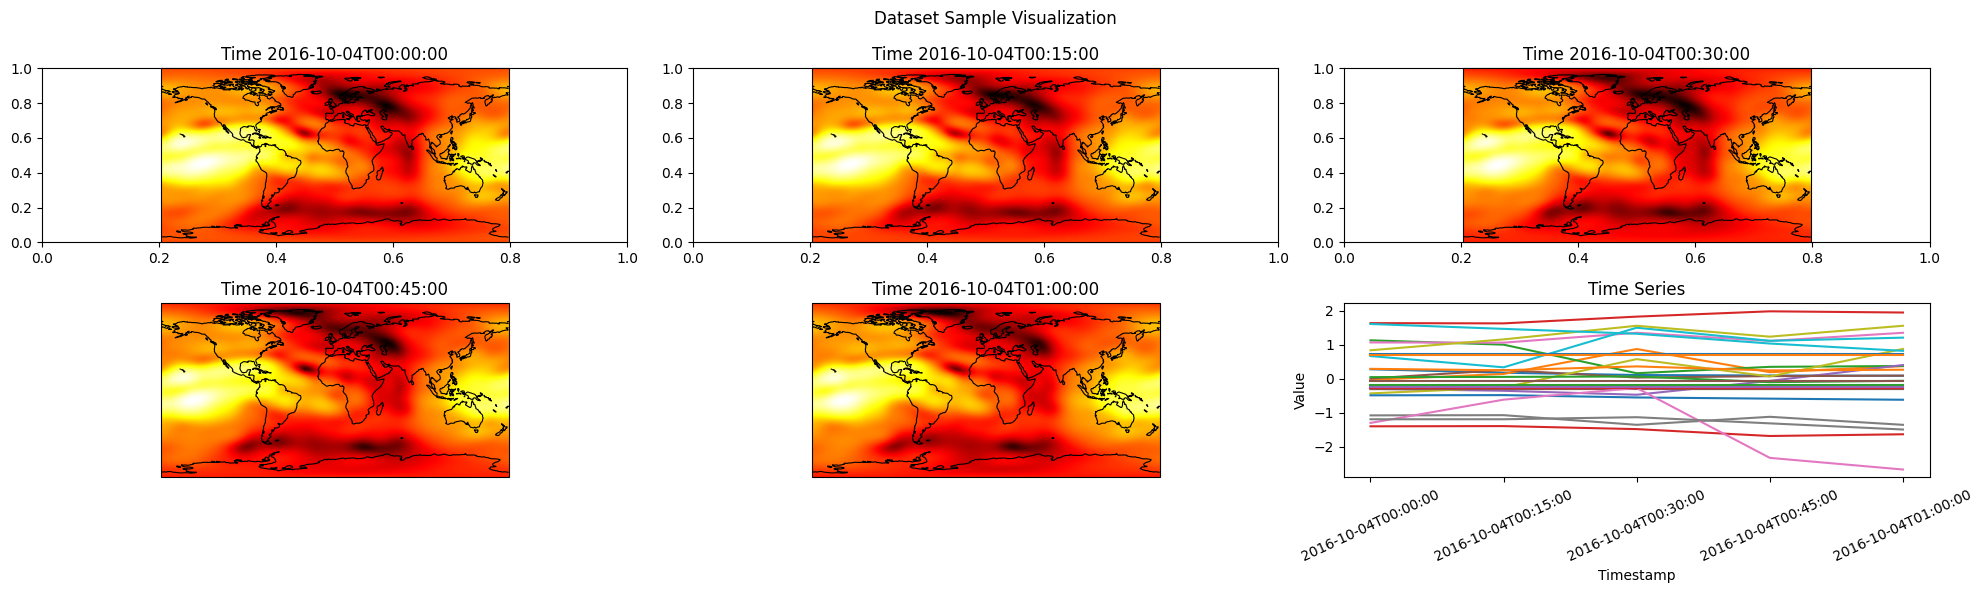

In [42]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

imgs, v1, v2, v3, times = sequence_dataset[2000]
seq_len = 3
fig, axs = plt.subplots(2, seq_len, figsize=(20, 6))  # 2 rows: 1 for images, 1 for timeseries plot
fig.suptitle("Dataset Sample Visualization")

# Plot heatmap images
for i, img in enumerate(imgs):
    ax = plt.subplot(2, seq_len, i + 1, projection=ccrs.PlateCarree())
    # ax = axs[0, i]
    # ax.imshow(img.squeeze(), cmap='viridis', interpolation='nearest')
    # ax.set_title(f"Time {times[i]}")
    # ax.axis('off')
    # # Show image using imshow with correct extent
    ax.imshow(
        img.squeeze(),
        origin='lower',
        extent=[-180, 180, -90, 90],  # lon_min, lon_max, lat_min, lat_max
        transform=ccrs.PlateCarree(),
        cmap='hot'
    )

    # Add Earth outline
    ax.coastlines(resolution='110m', color='black', linewidth=0.8)
    ax.set_title(f"Time {times[i]}")
    ax.set_xticks([])
    ax.set_yticks([])
# Plot time series in the middle subplot of second row (e.g., axs[1, 2])
ax_ts = axs[1, 2]
ax_ts.plot(times, v1, label="Vector 1")
ax_ts.plot(times, v2, label="Vector 2")
ax_ts.plot(times, v3, label="Vector 3")
ax_ts.set_title("Time Series")
ax_ts.set_xlabel("Timestamp")
ax_ts.set_ylabel("Value")
# ax_ts.legend()
plt.setp(ax_ts.get_xticklabels(), rotation=25)  # Rotate x labels
# ax_ts.legend()
for j in range(3):
    if j != 2:
        axs[1, j].axis('off')  # Hide unused subplots

plt.tight_layout()
plt.show()

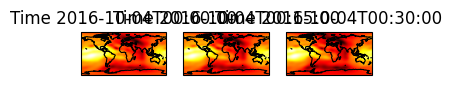

In [ ]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Assumes:
# imgs = list of (180, 360) arrays
# times = list/array of 5 timestamps
# axs is the 2-row, 5-column grid from previous layout

for i, img in enumerate(imgs):
    ax = plt.subplot(2, seq_len, i + 1, projection=ccrs.PlateCarree())
    
    # Show image using imshow with correct extent
    ax.imshow(
        img.squeeze(),
        origin='lower',
        extent=[-180, 180, -90, 90],  # lon_min, lon_max, lat_min, lat_max
        transform=ccrs.PlateCarree(),
        cmap='hot'
    )

    # Add Earth outline
    ax.coastlines(resolution='110m', color='black', linewidth=0.8)
    ax.set_title(f"Time {times[i]}")
    ax.set_xticks([])
    ax.set_yticks([])


In [29]:
import numpy as np
vtec, omni, celestrak, solar, timestamps = sequence_dataset[100]
all_params = np.concatenate([omni, celestrak, solar], axis=1)
seq_len = 5

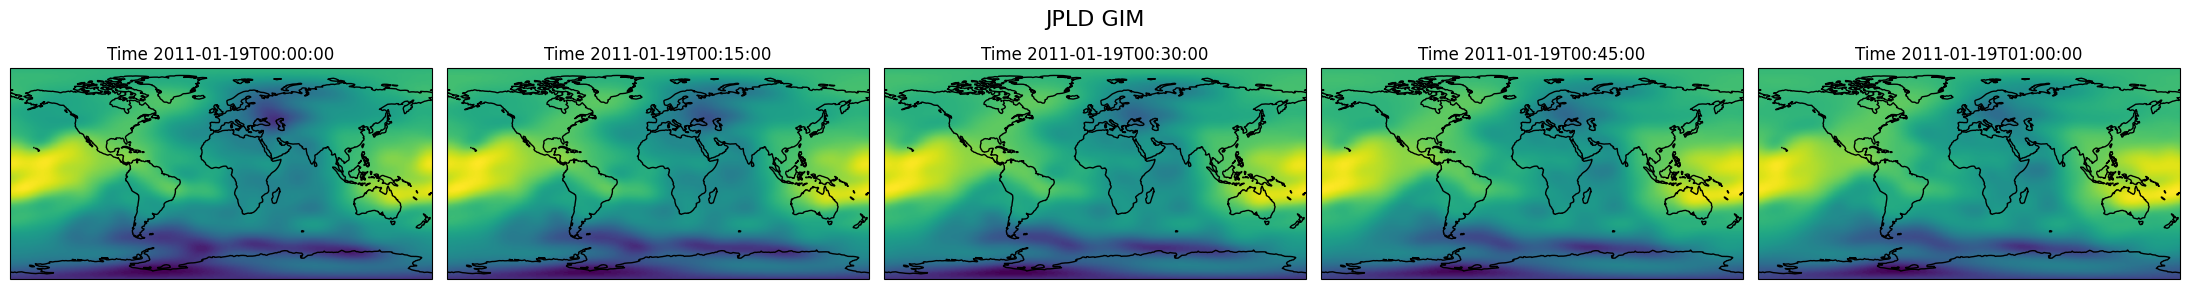

In [41]:
n_rows_ts = 6  # 5 rows of 5 vars each + 1 (last) row of 1 var
n_cols_ts = 5

fig = plt.figure(figsize=(22, 12))
gs = fig.add_gridspec(3, 5, height_ratios=[1, 1, 2])  # Top: vtec maps; Bottom: time series

# === Plot vtec maps ===
for i in range(seq_len):
    ax = fig.add_subplot(gs[0, i], projection=ccrs.PlateCarree())
    ax.imshow(
        vtec[i, 0],
        extent=[-180, 180, -90, 90],
        origin='lower',
        transform=ccrs.PlateCarree(),
        cmap='viridis'
    )
    ax.coastlines()
    ax.set_title(f'Time {timestamps[i]}')
    ax.set_xticks([])
    ax.set_yticks([])

# # === Plot time series ===
# for i in range(26):
#     row = 1 + (i // n_cols_ts)
#     col = i % n_cols_ts
#     ax = fig.add_subplot(gs[row, col])
#     ax.plot(timestamps, all_params[:, i])
#     ax.set_title(f'Param {i}')
#     ax.tick_params(axis='x', rotation=45)

# # Hide any unused subplot in last row
# for i in range(26, n_rows_ts * n_cols_ts):
#     row = 1 + (i // n_cols_ts)
#     col = i % n_cols_ts
#     ax = fig.add_subplot(gs[row, col])
#     ax.axis('off')

fig.suptitle("JPLD GIM", fontsize=16)
plt.tight_layout()
plt.show()


In [38]:
cols = [col for dataset_ in sequence_dataset.datasets if hasattr(dataset_, "column") for col in dataset_.column]
cols

['B_mag',
 'Bx_GSE',
 'By_GSM',
 'Bz_GSM',
 'RMS_B_scalar',
 'RMS_B_vector',
 'V_flow',
 'Vx',
 'Vy',
 'Vz',
 'Density',
 'Temp',
 'P_dyn',
 'E_field',
 'Beta',
 'Mach_Alfven',
 'SYM_D',
 'SYM_H',
 'ASY_D',
 'ASY_H',
 'Kp',
 'Ap',
 'F10',
 'S10',
 'M10',
 'Y10']

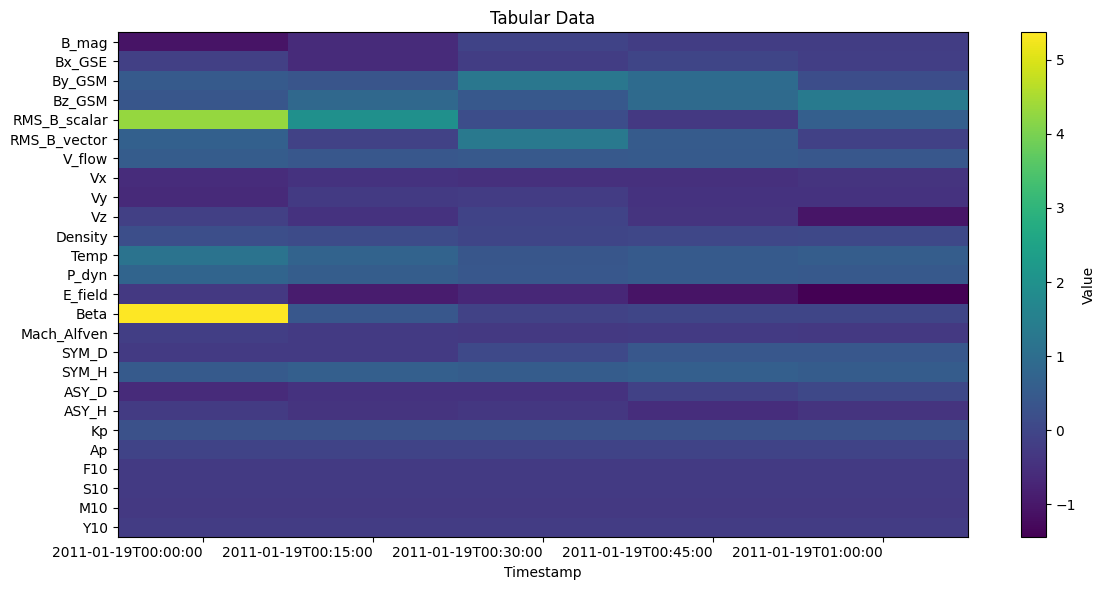

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Shape: (seq_len, 26) — your full concatenated array
# e.g., all_params = np.concatenate([omni, celestrak, solar], axis=1)
data = all_params.T  # shape becomes (26, seq_len), rows = params, cols = time

fig, ax = plt.subplots(figsize=(12, 6))

im = ax.imshow(
    data, 
    aspect='auto', 
    interpolation='none', 
    cmap='viridis'
)

# Axis labels
ax.set_xlabel("Timestamp")
ax.set_title("Tabular Data")

# Timestamps as x-tick labels
ax.set_xticks(np.arange(len(timestamps)))
ax.set_xticklabels(timestamps, rotation=0, ha='right')

# Optional: param indices as y-tick labels
ax.set_yticks(np.arange(26))
ax.set_yticklabels([f"{cols[i]}" for i in range(26)])

# Colorbar
cbar = fig.colorbar(im, ax=ax)
cbar.set_label("Value")

plt.tight_layout()
plt.show()
